<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/REML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Initialization

# Pi = 6000

dx = 1000
dy = 1000
dz = 75

B = 1 #RB/STB
c = 3.5*(10**(-6)) #psi-1

kx = 15 #mD
phi= 0.18

mu = 10 #cp

dt = 1/24 #days

#Well Block index wb

wb = 3 # 0,1,2,3 (block 4)


#Calclulation

Ax = dy*dz #ft2

Vb = dx*dy*dz #ft3

qsc_wb = -150 #stb/d

Tx = (0.001127)*(kx)*(Ax)/(mu*B*dx)

M = 5.615*B*dt/Vb/phi/c

In [10]:
t = np.arange(0,365+dt, dt)

len(t)

8762

In [3]:
P = np.ones(5)*6000

In [11]:
#creating a space-time 2D matrix
P_r = np.zeros((len(t),5))

In [17]:
wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])

#West Boundary Pressure
P_w = 6000 #psi

for j in range(1,len(t)):

  for i in range(1, len(P)-1):

    P_r[j,i] = P_r[j-1,i] + M*qsc[i] + M*(Tx*(P_r[j-1,i-1] - P_r[j-1,i]) + Tx*(P_r[j-1,i+1] - P_r[j-1,i]))
  
  P_r[j,0] = P_w

  P_r[j,-1]= P_r[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_r[j-1,-2] - P_r[j-1,-1]))

In [18]:
temp = pd.DataFrame(P_r)

In [14]:
temp.loc[0,:] = P

In [20]:
temp

,0,1,2,3,4
0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000
1,6000.0,6000.000000,6000.000000,5999.257275,6000.000000
2,6000.0,6000.000000,5999.999534,5998.515483,5999.999534
3,6000.0,6000.000000,5999.998602,5997.774621,5999.998602
4,6000.0,5999.999999,5999.997207,5997.034689,5999.997206
...,...,...,...,...,...
8757,6000.0,5482.235609,4884.225152,4135.398963,4366.460761
8758,6000.0,5482.185232,4884.130471,4135.271401,4366.315703
8759,6000.0,5482.134858,4884.035798,4135.143848,4366.170656
8760,6000.0,5482.084488,4883.941132,4135.016304,4366.025620


#Let's Apply machine learning to it now.

In [32]:
from sklearn import linear_model

from sklearn.linear_model import LinearRegression

In [23]:
df = temp.copy()

In [25]:
df.columns = ['Block0','Block1','Block2','Block3','Block4']

In [76]:
X = df[[ 'Block1', 'Block2', 'Block4']]

y = df['Block3']

In [77]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.00000000e+00  7.77796549e+11  7.77796549e+11 -7.77796549e+11]


In [62]:
y_p = lm.predict( X_test)

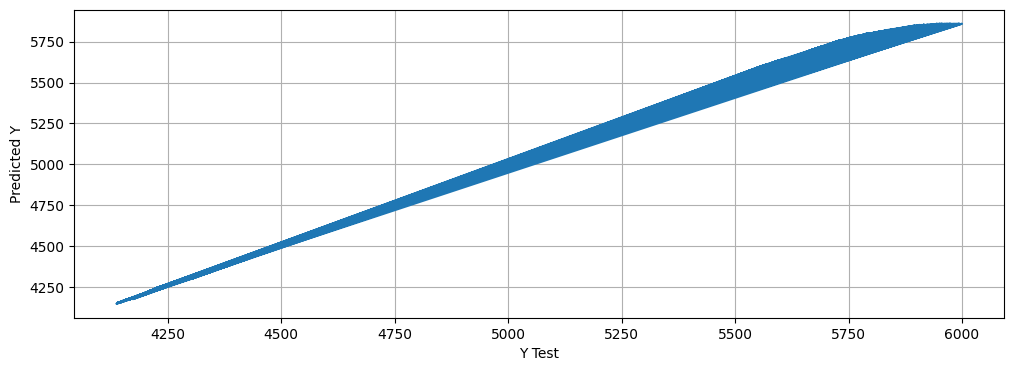

In [63]:
plt.figure(figsize=(12,4))

plt.style.use('default')

plt.plot(y_test,y_p)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

plt.grid()

In [65]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_p))
print('MSE:', metrics.mean_squared_error(y_test, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))

MAE: 12.39610236638533
MSE: 333.5549822112349
RMSE: 18.26348767928062


In [71]:
m_a_e = metrics.mean_absolute_error(y_test, y_p)
m_s_e =  metrics.mean_squared_error(y_test, y_p)

r_m_s_e =  np.sqrt(m_s_e)

In [72]:
d = {'Metrics':['Mean Absolute Error(Psi)', 'Mean Squared Error', 'Root Mean Sq. Error(Psi)'],
     'Values':[m_a_e,m_s_e,r_m_s_e]}

err = pd.DataFrame(d)

In [73]:
err

,Metrics,Values
0,Mean Absolute Error(Psi),12.396102
1,Mean Squared Error,333.554982
2,Root Mean Sq. Error(Psi),18.263488


In [80]:
# coeffecients = pd.DataFrame(lm.coef_,X.columns)
# coeffecients.columns = ['Coeffecient']
# coeffecients

In [79]:
#Mock Predictions


In [78]:
# prediction